In [28]:
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace

import pandas as pd
import numpy as np

In [2]:
metadata = pd.read_csv("metadata_all.csv")

In [23]:
M_clade = metadata.query("Country in ['Malaysia', 'Cambodia']").ID.values
B_clade = metadata.query("Country in ['India', 'Bangladesh', 'Thailand']").ID.values

array(['AF212302', 'AF376747', 'AJ564621', 'AJ564622', 'AJ564623',
       'AJ627196', 'AY029767', 'AY029768', 'FN869553', 'HM545087',
       'KY425646', 'KY425655', 'MK673558', 'MK673559', 'MK673560',
       'MK673561', 'MK673562', 'MK673563', 'MK801755', 'NC_002728',
       'AY858111', 'HM545086'], dtype=object)

In [15]:
t = Tree("trees/P_no_stop_codons_iqtree.nwk")
t2 = Tree("trees/P_no_stop_codons_HeV_iqtree.nwk")

In [ ]:
t2.get_common_ancestor("E","D")

In [16]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = False
ts.show_branch_support = True

In [62]:
metadata["country_color"] = metadata["Country"].map({"Malaysia": "purple",
                                                     "India": "darkgreen",
                                                     "Bangladesh": "blue",
                                                     "Thailand": "black",
                                                     "Australia": "orange",
                                                     "Cambodia": "gray"
                                                    })

metadata["clade_color"] = metadata["Clade"].map({"B-1": "blue", "B-2": "red"})

# need a dictionary mapping every node name to a color
country_color_dict = dict(zip(metadata["ID"], metadata["country_color"]))
B_clade_color_dict = dict(zip(metadata["ID"], metadata["clade_color"]))

In [69]:
def node_layout(color_dict):
    
    def layout(node):
        if node.is_leaf():
            #print(country_col_dict[node.name])
            N = AttrFace("name", 
                         fgcolor=color_dict[node.name], 
                         fsize=7)
            faces.add_face_to_node(N, node, 0, 
                                  position='branch-top'
                                  )
    return layout

def get_example_tree(tree_file, color_dict, out_group=None):
    
    t = Tree(tree_file)
    t.ladderize()
    
    if out_group is not None:
        t.set_outgroup(out_group)
    
    for n in t.traverse():
        nstyle = NodeStyle()
        nstyle["fgcolor"] = "black"
        nstyle["size"] = 1
        n.set_style(nstyle)
    
    ts = TreeStyle()
    ts.layout_fn = node_layout(color_dict)
    ts.show_leaf_name = False
    ts.show_branch_support = True
    #ts.title.add_face(TextFace("Phosphoprotein Sequences, 45", fsize=10), column=0)

    return t, ts

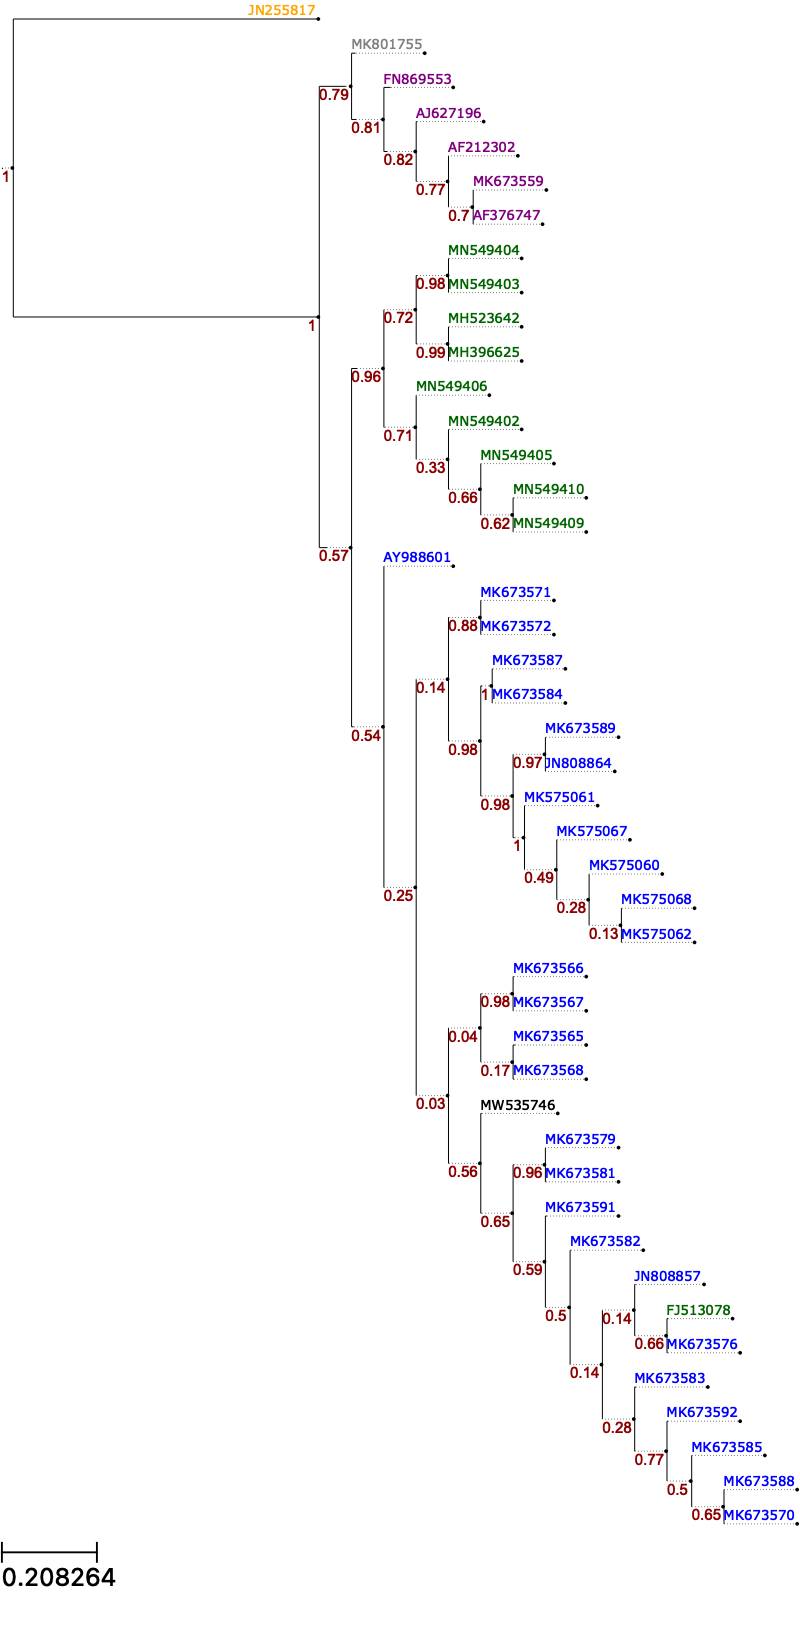

In [79]:
t, ts = get_example_tree("trees/P_no_stop_codons_HeV_iqtree.nwk", country_color_dict, "JN255817")
t.render(w=800, tree_style=ts,
         #file_name="trees/P_HeV.png", 
         file_name="%%inline"
         )

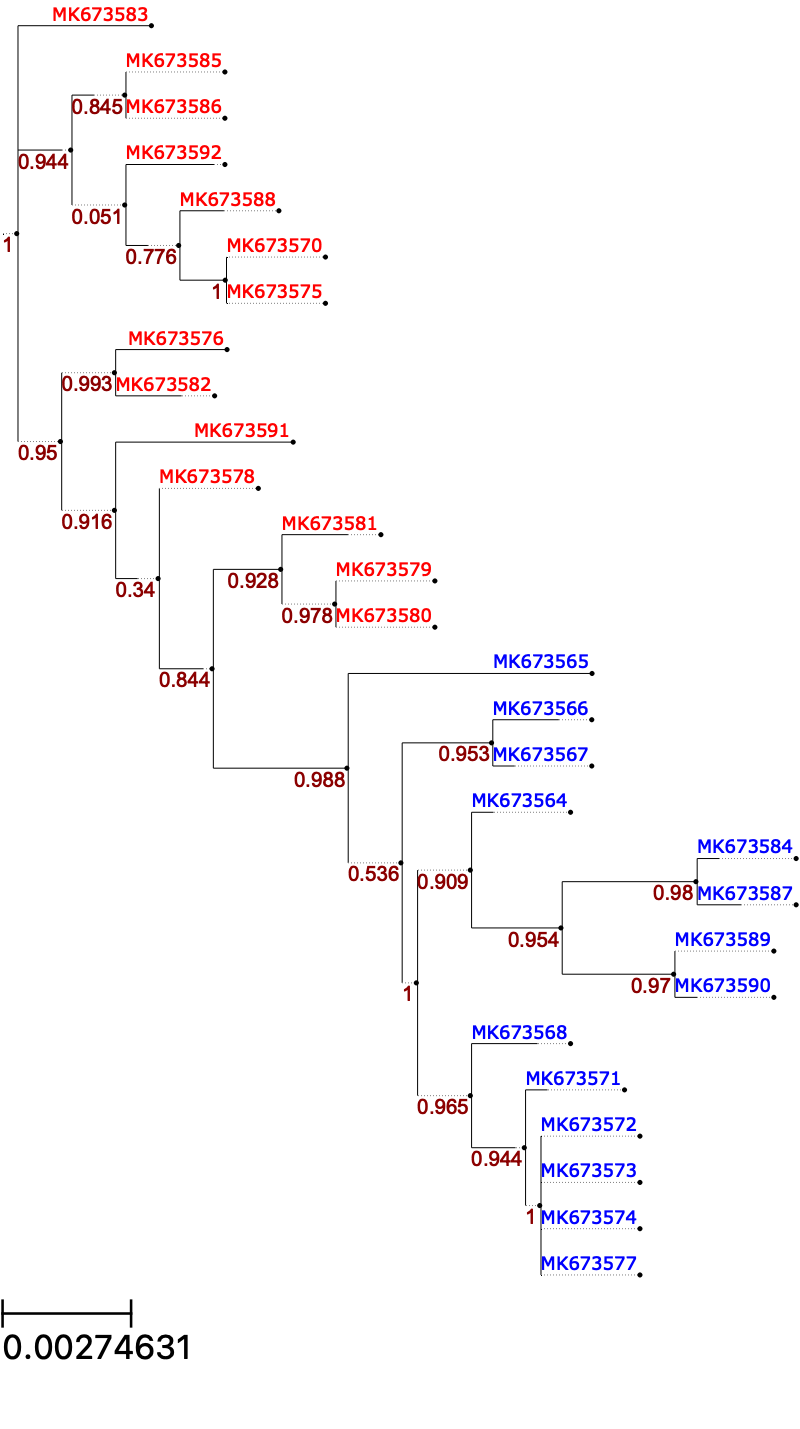

In [80]:
t, ts = get_example_tree("trees/P_whitmer_BGD_FT.nwk", B_clade_color_dict)
t.render(w=800, tree_style=ts,
         #file_name="trees/P_B_clade.png", 
         file_name="%%inline"
         )